<a href="https://colab.research.google.com/github/madhurireddy/SemanticTags/blob/master/LAWRENCE_HSIA_Data_Viz_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
Final project objective is to find data that's meaningful to you. Present that
data, explain how it was made, and what the actual story you mean to tell is. 
The idea is that you come up in front of the class, show the work, show the
code, and tell your thought process while you went through it.
'''

'''
On the class "Final projects" Google Sheets I put in 'Analysis of food 
production using the "Who eats the food we grow?" dataset from Kaggle' as my
project. This dataset is made up of worldwide food/feed production, 1961-2013.

I was interested in this dataset as a whole because the idea of future 
population growth vs. the food supply has always been an issue. In 1798, Thomas
Malthus published a work warning that there was simply no hope that the
world's food supply could ever keep up with the human population. We don't eat 
all the food we produce, but just how much? And even then, who is producing the 
most food?

'''

#Import the imports
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Upload the file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving FAO.csv to FAO.csv


In [0]:
# Need this decoding bit at the end or get ainvalid continuation byte error
import io

df = pd.read_csv(io.StringIO(uploaded['FAO.csv'].decode('ISO-8859-1')))

In [0]:
# First look at the data
df.head(3)

Area Abbreviation  Area Code         Area  ...   Y2011 Y2012  Y2013
0               AFG          2  Afghanistan  ...  4711.0  4810   4895
1               AFG          2  Afghanistan  ...   476.0   425    422
2               AFG          2  Afghanistan  ...   203.0   367    360

[3 rows x 63 columns]

In [0]:
# Can also look at the end of the data
df.tail(3)

Area Abbreviation  Area Code      Area  ...  Y2011 Y2012  Y2013
21474               ZWE        181  Zimbabwe  ...   40.0    40     40
21475               ZWE        181  Zimbabwe  ...    0.0     0      0
21476               ZWE        181  Zimbabwe  ...    0.0     0      0

[3 rows x 63 columns]

In [0]:
# See the columns
print(df.columns.values)

['Area Abbreviation' 'Area Code' 'Area' 'Item Code' 'Item' 'Element Code'
 'Element' 'Unit' 'latitude' 'longitude' 'Y1961' 'Y1962' 'Y1963' 'Y1964'
 'Y1965' 'Y1966' 'Y1967' 'Y1968' 'Y1969' 'Y1970' 'Y1971' 'Y1972' 'Y1973'
 'Y1974' 'Y1975' 'Y1976' 'Y1977' 'Y1978' 'Y1979' 'Y1980' 'Y1981' 'Y1982'
 'Y1983' 'Y1984' 'Y1985' 'Y1986' 'Y1987' 'Y1988' 'Y1989' 'Y1990' 'Y1991'
 'Y1992' 'Y1993' 'Y1994' 'Y1995' 'Y1996' 'Y1997' 'Y1998' 'Y1999' 'Y2000'
 'Y2001' 'Y2002' 'Y2003' 'Y2004' 'Y2005' 'Y2006' 'Y2007' 'Y2008' 'Y2009'
 'Y2010' 'Y2011' 'Y2012' 'Y2013']


In [0]:
# Renaming some of the columns to remove spaces. This helps sometimes.
df = df.rename(columns={'Area Abbreviation': 'Area_Abbreviation','Area Code': 
                        'Area_Code', 'Item Code': 'Item_Code', 'Element Code': 
                        'Element_Code'})

In [0]:
# Print the info. 21477 entries. Looks like there's a lot of missing values for
# the earlier years of the dataset. Unfortunately, there is no way of 
# determining if this is because of lack of recording at the time or if that
# country simply didn't exist at the time.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
Area_Abbreviation    21477 non-null object
Area_Code            21477 non-null int64
Area                 21477 non-null object
Item_Code            21477 non-null int64
Item                 21477 non-null object
Element_Code         21477 non-null int64
Element              21477 non-null object
Unit                 21477 non-null object
latitude             21477 non-null float64
longitude            21477 non-null float64
Y1961                17938 non-null float64
Y1962                17938 non-null float64
Y1963                17938 non-null float64
Y1964                17938 non-null float64
Y1965                17938 non-null float64
Y1966                17938 non-null float64
Y1967                17938 non-null float64
Y1968                17938 non-null float64
Y1969                17938 non-null float64
Y1970                17938 non-null float64
Y1971                1

In [0]:
# Max values of yearly production goes up as time goes on.
df.describe()

Area_Code     Item_Code  ...          Y2012          Y2013
count  21477.000000  21477.000000  ...   21477.000000   21477.000000
mean     125.449411   2694.211529  ...     560.569214     575.557480
std       72.868149    148.973406  ...    6047.950804    6218.379479
min        1.000000   2511.000000  ...    -169.000000    -246.000000
25%       63.000000   2561.000000  ...       0.000000       0.000000
50%      120.000000   2640.000000  ...       8.000000       8.000000
75%      188.000000   2782.000000  ...      88.000000      90.000000
max      276.000000   2961.000000  ...  479028.000000  489299.000000

[8 rows x 58 columns]

In [0]:
# Fill all the null values of production with 0. Realistically there was 
# unrecorded production, but they were not tracked for this dataset.
df.fillna(0)

Area_Abbreviation  Area_Code         Area  ...   Y2011 Y2012  Y2013
0                   AFG          2  Afghanistan  ...  4711.0  4810   4895
1                   AFG          2  Afghanistan  ...   476.0   425    422
2                   AFG          2  Afghanistan  ...   203.0   367    360
3                   AFG          2  Afghanistan  ...    72.0    78     89
4                   AFG          2  Afghanistan  ...   191.0   200    200
...                 ...        ...          ...  ...     ...   ...    ...
21472               ZWE        181     Zimbabwe  ...   457.0   426    451
21473               ZWE        181     Zimbabwe  ...    15.0    15     15
21474               ZWE        181     Zimbabwe  ...    40.0    40     40
21475               ZWE        181     Zimbabwe  ...     0.0     0      0
21476               ZWE        181     Zimbabwe  ...     0.0     0      0

[21477 rows x 63 columns]

In [0]:
# How many unique countries are tracked in this dataset? 

# This dataset contains most of the countries in the world considering that the
# number of independent countries at any given time hovers around 190.
df.Area.nunique()

174

In [0]:
# Need to increase max row display in order to prevent truncation of nunique() 
# on everything at once
pd.options.display.max_rows = 100

In [0]:
# Applying nunique() to all columns. Element_Code, Element, and Unit could get a
# closer look
df.apply(lambda X: X.nunique())

Area_Abbreviation     169
Area_Code             174
Area                  174
Item_Code             117
Item                  115
Element_Code            2
Element                 2
Unit                    1
latitude              173
longitude             174
Y1961                1197
Y1962                1215
Y1963                1209
Y1964                1236
Y1965                1259
Y1966                1263
Y1967                1283
Y1968                1300
Y1969                1309
Y1970                1322
Y1971                1351
Y1972                1360
Y1973                1374
Y1974                1388
Y1975                1405
Y1976                1410
Y1977                1411
Y1978                1463
Y1979                1473
Y1980                1477
Y1981                1469
Y1982                1508
Y1983                1528
Y1984                1540
Y1985                1538
Y1986                1563
Y1987                1592
Y1988                1613
Y1989       

In [0]:
# Resetting the max row display
pd.options.display.max_rows = 10

In [0]:
# Closer look at the Unit column that has one unique value. This is the units 
# of the values
df.Unit.unique()

array(['1000 tonnes'], dtype=object)

In [0]:
# Converting to pounds out of habit
1000 * 2000

2000000

In [0]:
# Closer look at the Element column that has two unique values. This is the 
# category of whether the item was considered food (for human consumption) or 
# feed (for livestock/poultry consumption)
df.Element.unique()

array(['Food', 'Feed'], dtype=object)

In [0]:
# Closer look at the Element_Code column that has two unique values. These are
# codes corresponding to the Food and Feed categories 
df.Element_Code.unique()

array([5142, 5521])

In [0]:
# Let's look at the items they tracked. Looks like a lot of overlap.
df.Item.unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Millet and products',
       'Cereals, Other', 'Potatoes and products', 'Sugar cane',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Sweeteners, Other',
       'Honey', 'Pulses, Other and products', 'Nuts and products',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine 

In [0]:
# Implementing a pivot to isolate 2013 production of items in terms of Feed and
# Food
df_pivot = pd.pivot_table(df, values='Y2013',index='Item',columns='Element')
df_pivot

Element                         Feed         Food
Item                                             
Alcoholic Beverages              NaN  1506.942197
Animal fats                18.443396   133.511494
Apples and products        33.150000   406.155172
Aquatic Animals, Others          NaN     9.251852
Aquatic Plants            156.000000    88.314815
...                              ...          ...
Vegetables                615.571429  5649.275862
Vegetables, Other         587.690476  4380.057471
Wheat and products       1309.777778  2631.172414
Wine                             NaN   136.005917
Yams                      327.533333   433.480000

[115 rows x 2 columns]

In [0]:
# Fill the null values with 0. Filled values were not necessarily 0 in reality, 
# but if there's no info for tracking a particular item in a category then it 
# can't be too much 
df_pivot = df_pivot.fillna(0)
df_pivot

Element                         Feed         Food
Item                                             
Alcoholic Beverages         0.000000  1506.942197
Animal fats                18.443396   133.511494
Apples and products        33.150000   406.155172
Aquatic Animals, Others     0.000000     9.251852
Aquatic Plants            156.000000    88.314815
...                              ...          ...
Vegetables                615.571429  5649.275862
Vegetables, Other         587.690476  4380.057471
Wheat and products       1309.777778  2631.172414
Wine                        0.000000   136.005917
Yams                      327.533333   433.480000

[115 rows x 2 columns]

In [0]:
# Adding a Percent_Feed column based on the percent of the total production of 
# an item used as Feed in 2013
df_pivot['Percent_Feed'] = (df_pivot['Feed']/(df_pivot['Feed']+df_pivot['Food'])
  ) * 100
df_pivot

Element                         Feed         Food  Percent_Feed
Item                                                           
Alcoholic Beverages         0.000000  1506.942197      0.000000
Animal fats                18.443396   133.511494     12.137415
Apples and products        33.150000   406.155172      7.546007
Aquatic Animals, Others     0.000000     9.251852      0.000000
Aquatic Plants            156.000000    88.314815     63.852043
...                              ...          ...           ...
Vegetables                615.571429  5649.275862      9.825801
Vegetables, Other         587.690476  4380.057471     11.830119
Wheat and products       1309.777778  2631.172414     33.235076
Wine                        0.000000   136.005917      0.000000
Yams                      327.533333   433.480000     43.039106

[115 rows x 3 columns]

In [0]:
# Adding a Total column based on the combined recorded Feed and Food of an item
# in 2013
df_pivot['Total'] = df_pivot['Feed'] + df_pivot['Food']

# The output sorted by total production
df_pivot.sort_values(by=['Food'], inplace=True, ascending=False)
df_pivot.head(10)

Element                          Feed         Food  Percent_Feed         Total
Item                                                                          
Cereals - Excluding Beer  5049.433526  5913.890805     46.057504  10963.324331
Vegetables                 615.571429  5649.275862      9.825801   6264.847291
Vegetables, Other          587.690476  4380.057471     11.830119   4967.747947
Milk - Excluding Butter    780.695238  3619.183908     17.743561   4399.879146
Fruits - Excluding Wine     42.258621  3131.482759      1.331508   3173.741379
Wheat and products        1309.777778  2631.172414     33.235076   3940.950192
Starchy Roots             1298.466667  2548.028736     33.757136   3846.495402
Rice (Milled Equivalent)   414.740741  2168.310345     16.056235   2583.051086
Meat                         6.000000  1737.994253      0.344038   1743.994253
Alcoholic Beverages          0.000000  1506.942197      0.000000   1506.942197

In [0]:
# The output sorted by Feed
df_pivot.sort_values(by=['Feed'], inplace=True, ascending=False)
df_pivot.head(10)

Element                          Feed         Food  Percent_Feed         Total
Item                                                                          
Cereals - Excluding Beer  5049.433526  5913.890805     46.057504  10963.324331
Maize and products        3350.404908   736.376471     81.981506   4086.781379
Wheat and products        1309.777778  2631.172414     33.235076   3940.950192
Starchy Roots             1298.466667  2548.028736     33.757136   3846.495402
Cassava and products       870.560000   805.096000     51.953384   1675.656000
Sweet potatoes             859.975610   385.527027     69.046470   1245.502637
Barley and products        791.948718    42.729560     94.880715    834.678278
Milk - Excluding Butter    780.695238  3619.183908     17.743561   4399.879146
Sugar cane                 738.918919   643.780000     53.440334   1382.698919
Rape and Mustard Oil       700.000000    81.700000     89.548420    781.700000

In [0]:
# The output sorted by percent used as feed. Lots of seeds, oats, and maize.
df_pivot.sort_values(by=['Percent_Feed'], inplace=True, ascending=False)
df_pivot.head(10)

Element                      Feed        Food  Percent_Feed        Total
Item                                                                    
Cottonseed             528.150000    0.000000    100.000000   528.150000
Sugar beet             221.321429    5.700000     97.489224   227.021429
Rape and Mustardseed   145.904762    6.772727     95.564030   152.677489
Barley and products    791.948718   42.729560     94.880715   834.678278
Sunflower seed          98.742857    7.887324     92.603104   106.630181
Fish, Body Oil           3.870000    0.421384     90.180704     4.291384
Rape and Mustard Oil   700.000000   81.700000     89.548420   781.700000
Oats                   133.204918   24.859873     84.272353   158.064791
Maize and products    3350.404908  736.376471     81.981506  4086.781379
Cereals, Other         137.934783   31.317647     81.496486   169.252430

In [0]:
# Calculating the sum of each column
tempTotal = df_pivot.sum(axis=0)
tempTotal

Element
Feed            23595.339012
Food            54567.281042
Percent_Feed     2654.618842
Total           78162.620054
dtype: float64

In [0]:
# Making a tiny table from the above data
temp_data = [['Feed', 23595.339012], ['Food', 54567.281042]]
df_temp = pd.DataFrame(temp_data, columns = ['Element', 'Sum'])
df_temp

Element           Sum
0    Feed  23595.339012
1    Food  54567.281042

Text(0, 0.5, 'In 1000s of Tons')

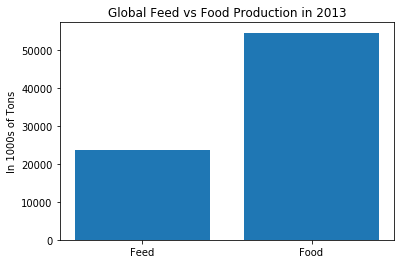

In [0]:
# Graphing this data with a title.

# On a global scale it appears that food items are generally used for food.
# Still, quite a sizeable amount is used for feed. Although this is less than I
# expected.
plt.bar(x='Element', data=df_temp, height = 'Sum')
plt.title('Global Feed vs Food Production in 2013')
plt.ylabel('In 1000s of Tons')

In [0]:
# Get the country count for the data
df.Area.nunique()

174

In [0]:
# List the countries for the data
df.Area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Congo', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'G

In [0]:
# Let's take a closer look at the United States for now
df_usa = df[df['Area']=='United States of America']

In [0]:
# First look at the United States data
df_usa.head(3)

Area_Abbreviation  Area_Code  ...  Y2012  Y2013
20394               USA        231  ...   9943   6196
20395               USA        231  ...  25757  25742
20396               USA        231  ...   2175   2203

[3 rows x 63 columns]

In [0]:
# Implementing a pivot table to aggregate the total Feed and Food production for
# any given year of this dataset
df_usa = df_usa.pivot_table(values = list(df.iloc[:,10:].columns), columns = 
                            'Element')

In [0]:
# Let's look at the pivot table
df_usa.head()

Element         Feed         Food
Y1961    6511.472222  3094.609524
Y1962    6348.361111  3121.695238
Y1963    6210.277778  3133.904762
Y1964    6069.777778  3211.095238
Y1965    6906.555556  3244.304762

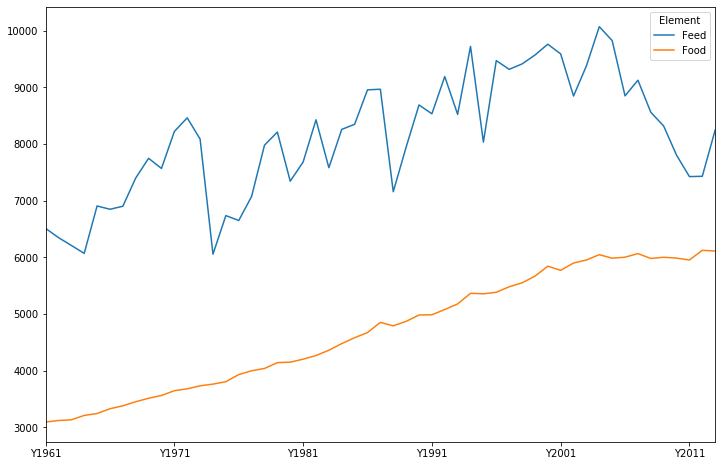

In [0]:
# Initial plot
df_usa.plot(figsize=(12, 8))

In [0]:
# Importing this because we're going to do a fivethirtyeight style plot
import matplotlib.style as style

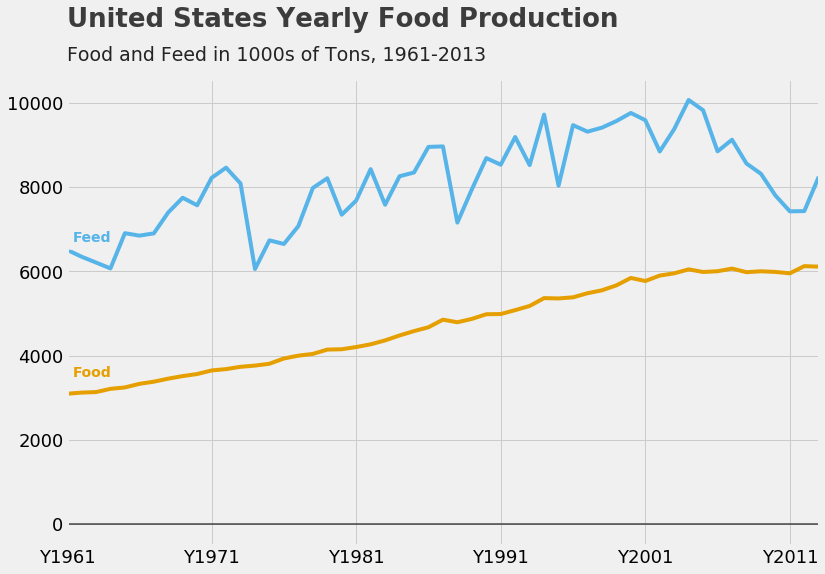

In [0]:
# The fivethirtyeight plot
style.use('fivethirtyeight')

colors = [[86/255,180/255,233/255], [230/255,159/255,0]]

df_usa_plot = df_usa.plot(figsize=(12, 8), color=colors, legend=False)

df_usa_plot.axhline(y=0, alpha=0.7, linewidth = 1.5, color='black')

df_usa_plot.tick_params(axis='both', which='major', labelsize=18)

# Add the labels
df_usa_plot.text(x = 0.4, y = 6700, s = 'Feed', color = colors[0], weight = 'bold', rotation =0,
               backgroundcolor = '#f0f0f0')

df_usa_plot.text(x = 0.4, y = 3500, s = 'Food', color = colors[1], weight = 'bold', rotation = 0,
               backgroundcolor = '#f0f0f0')

# Add the title
df_usa_plot.text(x = 0, y = 11800, s = "United States Yearly Food Production ",
              fontsize = 26, weight = 'bold', alpha = .75)
df_usa_plot.text(x = 0, y = 11000,
              s = 'Food and Feed in 1000s of Tons, 1961-2013',
              fontsize = 19, alpha = .85)

plt.show()

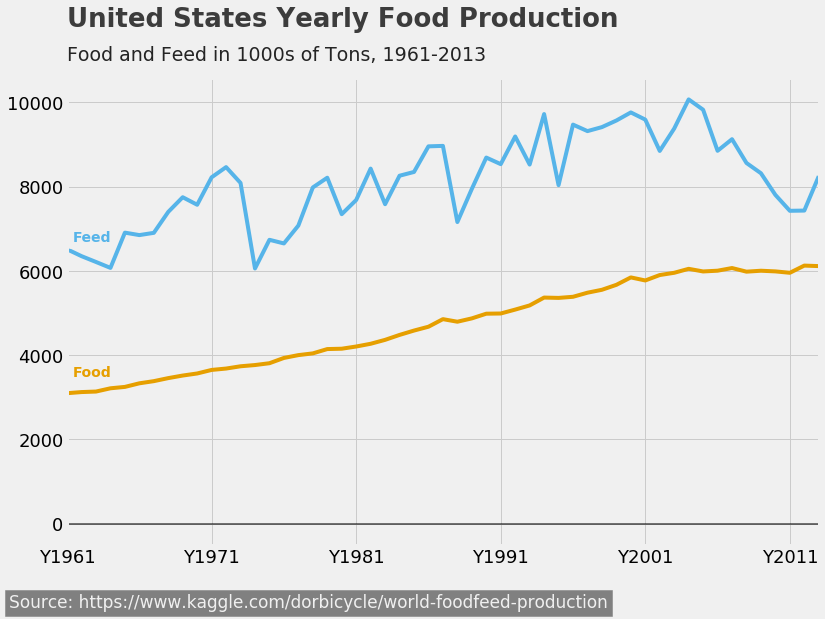

In [0]:
# Adding a source because that seems relevant to fivethirtyeight style

# From the graph it appears that in the United States the Feed production vastly
# outscales the Food production. While the Food production has steadily 
# increased over time, the Feed production has been behaving in a much more 
# erratic manner. Feed production appears to have been on a downward slope 
# starting from the early 2000s but a sharp increase from 2012 to 2013 just 
# exemplifies how erratic feed production amounts have been in the United 
# States.

style.use('fivethirtyeight')

colors = [[86/255,180/255,233/255], [230/255,159/255,0]]

df_usa_plot = df_usa.plot(figsize=(12, 8), color=colors, legend=False)

df_usa_plot.axhline(y=0, alpha=0.7, linewidth = 1.5, color='black')

df_usa_plot.tick_params(axis='both', which='major', labelsize=18)

# Add the labels
df_usa_plot.text(x = 0.4, y = 6700, s = 'Feed', color = colors[0], weight = 
                 'bold', rotation =0, backgroundcolor = '#f0f0f0')

df_usa_plot.text(x = 0.4, y = 3500, s = 'Food', color = colors[1], weight = 
                 'bold', rotation = 0, backgroundcolor = '#f0f0f0')

# Add the title
df_usa_plot.text(x = 0, y = 11800, s = "United States Yearly Food Production ",
              fontsize = 26, weight = 'bold', alpha = .75)
df_usa_plot.text(x = 0, y = 11000,
              s = 'Food and Feed in 1000s of Tons, 1961-2013',
              fontsize = 19, alpha = .85)

# Add a source
df_usa_plot.text(x=-4,
      y=-2000,
      s="Source: https://www.kaggle.com/dorbicycle/world-foodfeed-production",
      fontsize=17,
      color='#f0f0f0',
      backgroundcolor='grey'
                )

plt.show()

In [0]:
# For my final graph I wanted it to be that bar chart race detailed in 
# https://colab.research.google.com/github/pratapvardhan/notebooks/blob/master/barchart-race-matplotlib.ipynb 
# because it was something I gave up on in an earlier homework assignment that I
# had wanted to do originally

# Import the bar chart matplotlib imports

import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [0]:
# For my bar chart race I'm just going to do it by Food.
df_food_race = df[df['Element']== 'Food']

In [0]:
# First look at the data we've already first looked at a couple times out of
# habit. There actually is a reason though, it's too determine which columns are
# not needed for this bar chart race.
df_food_race.head(3)

Area_Abbreviation  Area_Code         Area  ...   Y2011 Y2012  Y2013
0               AFG          2  Afghanistan  ...  4711.0  4810   4895
1               AFG          2  Afghanistan  ...   476.0   425    422
3               AFG          2  Afghanistan  ...    72.0    78     89

[3 rows x 63 columns]

In [0]:
# Determined these columns to be dropped. We're going to keep Area, all the
# years, and the Food production values 
df_food_race = df_food_race.drop(['Area_Abbreviation','Item','Element','Unit',
                                  'Area_Code','Element_Code','Item_Code',
                                  'latitude','longitude'], axis = 1)

In [0]:
# Looking to see how the data looks now
df_food_race

Area   Y1961   Y1962   Y1963  ...   Y2010   Y2011  Y2012  Y2013
0      Afghanistan  1928.0  1904.0  1666.0  ...  4605.0  4711.0   4810   4895
1      Afghanistan   183.0   183.0   182.0  ...   442.0   476.0    425    422
3      Afghanistan   237.0   237.0   237.0  ...    60.0    72.0     78     89
5      Afghanistan   403.0   403.0   410.0  ...    82.0    73.0     77     76
6      Afghanistan    17.0    18.0    19.0  ...    14.0    14.0     14     12
...            ...     ...     ...     ...  ...     ...     ...    ...    ...
21470     Zimbabwe     6.0     6.0     6.0  ...    27.0    24.0     24     25
21472     Zimbabwe   230.0   232.0   234.0  ...   418.0   457.0    426    451
21474     Zimbabwe     6.0     6.0     6.0  ...    29.0    40.0     40     40
21475     Zimbabwe     0.0     0.0     0.0  ...     0.0     0.0      0      0
21476     Zimbabwe     0.0     0.0     0.0  ...     0.0     0.0      0      0

[17528 rows x 54 columns]

In [0]:
# Implementing a reverse pivot in order to feed it later into the bar charts

df_food_race = df_food_race.melt(id_vars=['Area'],var_name='Year', 
                                 value_name='Value')
df_food_race

Area   Year   Value
0       Afghanistan  Y1961  1928.0
1       Afghanistan  Y1961   183.0
2       Afghanistan  Y1961   237.0
3       Afghanistan  Y1961   403.0
4       Afghanistan  Y1961    17.0
...             ...    ...     ...
928979     Zimbabwe  Y2013    25.0
928980     Zimbabwe  Y2013   451.0
928981     Zimbabwe  Y2013    40.0
928982     Zimbabwe  Y2013     0.0
928983     Zimbabwe  Y2013     0.0

[928984 rows x 3 columns]

In [0]:
# Removing the first character of the Year column in order to isolate a number
df_food_race['Year'] = df_food_race['Year'].str[1:]
df_food_race

Area  Year   Value
0       Afghanistan  1961  1928.0
1       Afghanistan  1961   183.0
2       Afghanistan  1961   237.0
3       Afghanistan  1961   403.0
4       Afghanistan  1961    17.0
...             ...   ...     ...
928979     Zimbabwe  2013    25.0
928980     Zimbabwe  2013   451.0
928981     Zimbabwe  2013    40.0
928982     Zimbabwe  2013     0.0
928983     Zimbabwe  2013     0.0

[928984 rows x 3 columns]

In [0]:
# Implementing another pivot table to aggregate the values for any specific
# country and year combo. For example, Afghanistan 1961 no longer has a value
# for every individual item now.
df_food_race = pd.pivot_table(df_food_race, index=["Area","Year"])
df_food_race

Value
Area        Year            
Afghanistan 1961  120.013699
            1962  119.095890
            1963  115.863014
            1964  129.178082
            1965  133.602740
...                      ...
Zimbabwe    2009   80.722222
            2010   83.916667
            2011   87.629630
            2012   89.453704
            2013   88.185185

[8289 rows x 1 columns]

In [0]:
# Resetting the index because multiple indexes is confusing
df_food_race = df_food_race.reset_index()

In [0]:
# This is what we want for input, wrangling complete
df_food_race

Area  Year       Value
0     Afghanistan  1961  120.013699
1     Afghanistan  1962  119.095890
2     Afghanistan  1963  115.863014
3     Afghanistan  1964  129.178082
4     Afghanistan  1965  133.602740
...           ...   ...         ...
8284     Zimbabwe  2009   80.722222
8285     Zimbabwe  2010   83.916667
8286     Zimbabwe  2011   87.629630
8287     Zimbabwe  2012   89.453704
8288     Zimbabwe  2013   88.185185

[8289 rows x 3 columns]

In [0]:
# Adding a dummy category to match the implementation of region detailed in the 
# above linked barchart race ipynb
df_food_race['Area1'] = df_food_race['Area']

In [0]:
# Since we have 174 countries...
df_food_race['Area'].nunique()

174

In [0]:
#These 174 countries...
df_food_race['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Côte d'Ivoire", "Democratic People's Republic of Korea",
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'G

In [0]:
# We need to generate 174 colors for our racing bars. Your colors should be
# different if you run it yourself.

generated_colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(174)]
print(generated_colors)

['#56C308', '#571267', '#0D1A66', '#8A9D4F', '#693AC5', '#E5AB85', '#FE4909', '#3B76ED', '#10B32C', '#98DDE4', '#069E90', '#BA680E', '#F5A19B', '#735EDA', '#ECF0A8', '#456161', '#00CCC7', '#14D7D4', '#0B3EF6', '#DA2AA4', '#F21195', '#6491E7', '#0AB8E7', '#8A5384', '#519795', '#4EEB7F', '#719C8A', '#25FAFE', '#C7E134', '#55366F', '#1CF844', '#FACF7C', '#45D0B4', '#D7B478', '#BF77B9', '#A26D1F', '#DB66AA', '#156C16', '#77D9C9', '#6391F4', '#612891', '#BE4504', '#8BD7AA', '#66D28C', '#F44DC9', '#671C42', '#E61F54', '#09CAAF', '#873A42', '#479027', '#BE0615', '#2DBFD9', '#226F40', '#0D9EB9', '#6A2F60', '#280912', '#98BF0A', '#406BC8', '#0536D2', '#26809E', '#08482D', '#9286A9', '#9DF2D5', '#EDAA90', '#48A527', '#770B15', '#0245A0', '#76CD7B', '#5A4782', '#264193', '#FE5184', '#D423E2', '#A81FC3', '#C144DF', '#ADDC73', '#8DB558', '#989E15', '#539002', '#4F0577', '#6869AF', '#B25CF3', '#E3C272', '#938C38', '#F4D942', '#335E02', '#330A76', '#A349AE', '#FBEE4C', '#F3204F', '#0FAF98', '#E267F1'

In [0]:
# Zip each Area (country) to a color
colors = dict(zip(
    ['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Congo', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius',
       'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Caledonia',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Republic of Korea', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Sierra Leone', 'Slovakia', 'Slovenia', 'Solomon Islands',
       'South Africa', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname',
       'Swaziland', 'Sweden', 'Switzerland', 'Tajikistan', 'Thailand',
       'The former Yugoslav Republic of Macedonia', 'Timor-Leste', 'Togo',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United Republic of Tanzania', 'United States of America',
       'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen',
       'Zambia', 'Zimbabwe'],
    ['#DCCB1C', '#CF0A7B', '#E96FBC', '#519BC1', '#E7E258', '#CB364D', 
     '#1B95DA', '#E54C61', '#B50F3A', '#A8B0B7', '#745767', '#0A9874', 
     '#7A342F', '#94EE54', '#4D0B08', '#E69EF9', '#0FA22A', '#AE3486', 
     '#9BD406', '#5AAB99', '#1D0E01', '#C54510', '#6F7A91', '#16FDF9', 
     '#5AA6E8', '#4C9A59', '#EAB786', '#402B06', '#115D34', '#64AFBE', 
     '#53F7DB', '#AFFB4D', '#A66B55', '#3A7D3A', '#3BEEDB', '#A22265', 
     '#260C32', '#1C00B3', '#C97F5C', '#9C42EC', '#D754CB', '#C9B161', 
     '#46D111', '#9A17D5', '#A3E391', '#E3EAC1', '#30CC43', '#92C244', 
     '#17AA45', '#F5DBCF', '#FF73DC', '#9D96AA', '#0A66E1', '#4CCEFE', 
     '#B7BF70', '#6E6552', '#BDF2F8', '#59428F', '#E00480', '#E07FB5', 
     '#1E10FA', '#6A622C', '#1E8C4E', '#2F50BD', '#057A3F', '#3DC30C', 
     '#F4D024', '#1B5032', '#8BEB90', '#5044F9', '#CD7D82', '#A07E69', 
     '#E13AE0', '#E5FE91', '#3491F3', '#FC18A4', '#0655E4', '#0B2FB0', 
     '#F7AE42', '#47B8C2', '#BEB0D5', '#E94D3A', '#8DDF7F', '#B5BBD6', 
     '#F1CEA8', '#E014A0', '#107F2B', '#B1C476', '#6E6848', '#D6CF1B', 
     '#B2E230', '#AFB557', '#C53D33', '#0DE601', '#DDC941', '#518B46', 
     '#8B4CAB', '#7FD884', '#7F04BF', '#B53CCD', '#8E8210', '#33FC06', 
     '#278D35', '#A1A6F3', '#4D3232', '#C687EB', '#0EB0B2', '#F96D0F', 
     '#3BA6FA', '#DDF966', '#956BEB', '#77E879', '#2AE09F', '#4FD9B8', 
     '#B50E24', '#2E9EB8', '#09B86B', '#DA83E6', '#3EA30D', '#04FCF6', 
     '#719FAE', '#AC6B67', '#343590', '#D772E7', '#5E403C', '#0A235B', 
     '#AA7118', '#DE2269', '#263EF7', '#E55849', '#0E1B38', '#027374', 
     '#6BD6DD', '#43E9B1', '#D7C343', '#94E683', '#4FD3B9', '#11E58E', 
     '#62B927', '#447C4E', '#C3829A', '#2D8F2C', '#2551CC', '#3D9C7A', 
     '#9B1C42', '#C8D0E1', '#E59B30', '#35847A', '#73EA3A', '#2A46F6', 
     '#C766ED', '#F9F9B4', '#946622', '#FC96DC', '#E990E7', '#1A6C2B', 
     '#0899C0', '#255084', '#CBB10D', '#050F7E', '#F9FA93', '#A3A0BA', 
     '#F6DDCC', '#61CF59', '#5C7326', '#1005C2', '#9E4120', '#1DC2A3', 
     '#1873AA', '#52BE55', '#06D676', '#DFA553', '#0A68C5', '#83E053']
))

group_lk = df_food_race.set_index('Area1')['Area'].to_dict()

In [0]:
# Checking if our datatypes are correct. Looks like Year is still an object.
df_food_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 4 columns):
Area     8289 non-null object
Year     8289 non-null object
Value    8289 non-null float64
Area1    8289 non-null object
dtypes: float64(1), object(3)
memory usage: 259.2+ KB


In [0]:
# Year is now int64
df_food_race['Year'] = df_food_race['Year'].astype(np.int64)

In [0]:
# Confirmation of the previous change. Now we can code.
df_food_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 4 columns):
Area     8289 non-null object
Year     8289 non-null int64
Value    8289 non-null float64
Area1    8289 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 259.2+ KB


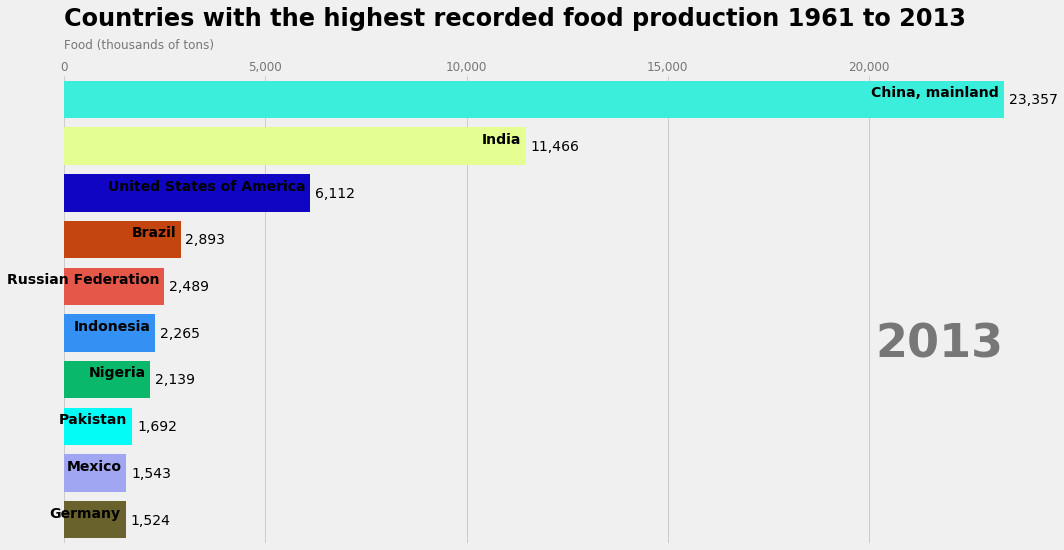

In [0]:
# Just year 2013 for a test

fig, ax = plt.subplots(figsize=(15, 8))

def draw_race_chart(current_year):
    food_race = df_food_race[df_food_race['Year'].eq(current_year)].sort_values(by='Value', ascending=True).tail(10)
    ax.clear()
    ax.barh(food_race['Area'], food_race['Value'], color=[colors[group_lk[x]] for x in food_race['Area']])
    dx = food_race['Value'].max() / 200
    for i, (value, name) in enumerate(zip(food_race['Value'], food_race['Area'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Food (thousands of tons)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Countries with the highest recorded food production 1961 to 2013',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)
    
draw_race_chart(2013)

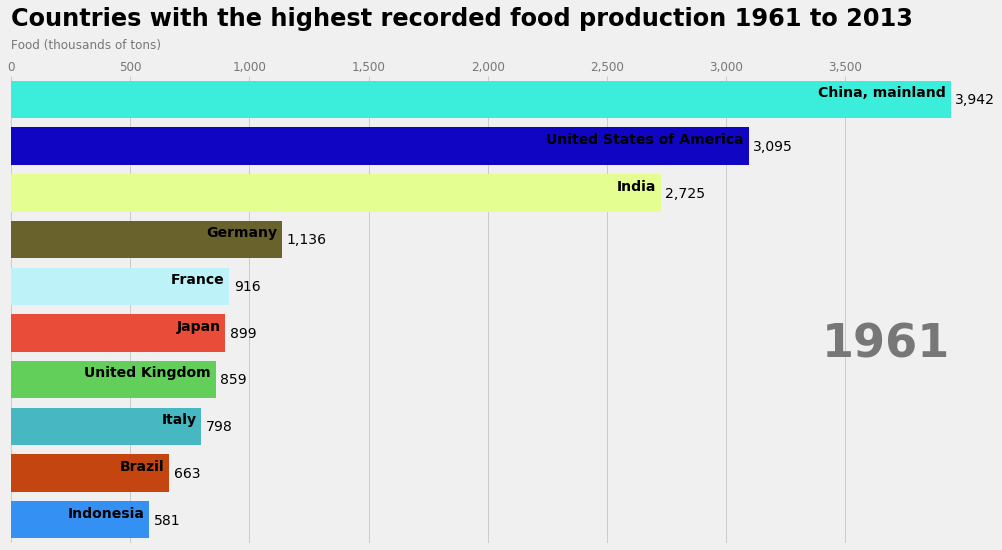

In [0]:
# Racing bar chart implemented successfully

fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_race_chart, frames=range(1961, 2014))
HTML(animator.to_jshtml())